### Problem Statement:
    

    

    A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the Corona 
    pandemic.The company is finding it very difficult to sustain in the current market scenario.To accelerate its revenue,
    they have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. 
    The main objective is to model the demand for shared bikes with the available independent variables.

### Reading the Bike sharing dataset:

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing numpy and pandas

import numpy as np
import pandas as pd

In [3]:
# read csv file

bike_sharing = pd.read_csv("bike sharing excel.csv")

In [4]:
# Check the head of the dataset

bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#information about the dataframe

bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing.shape

(730, 16)

In [7]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Check for Null/Missing values:

In [8]:
#percentage of missing values for each column

round(100*(bike_sharing.isnull().sum()/len(bike_sharing)),2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
##percentage of missing values for each row

round((bike_sharing.isnull().sum(axis=1)/len(bike_sharing))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

 Inference : No missing values found

###  Check for duplicate values

In [10]:
bike_dup = bike_sharing.copy()

In [11]:
bike_sharing.shape

(730, 16)

Inference: No duplicate values found

### Data Cleaning

In [12]:
#Checking value_counts() for entire dataframe.This will help to identify any Junk values present in the dataset.

#Create a copy of the dataframe, without the 'instant' column,as this will have unique values

bike_dummy=bike_sharing.iloc[:,1:16]

In [13]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

Inferences: There are no Junk values in the entire dataset.

### Removing unwanted columns:

In [14]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
bike_new = bike_sharing[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 
                         'hum', 'windspeed','cnt']]

In [16]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### DATA VISUALIZATION

Matplotlib and seaborn is used for data visualization

In [17]:
#import matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

To Visualize categorical variables, boxplot is used.

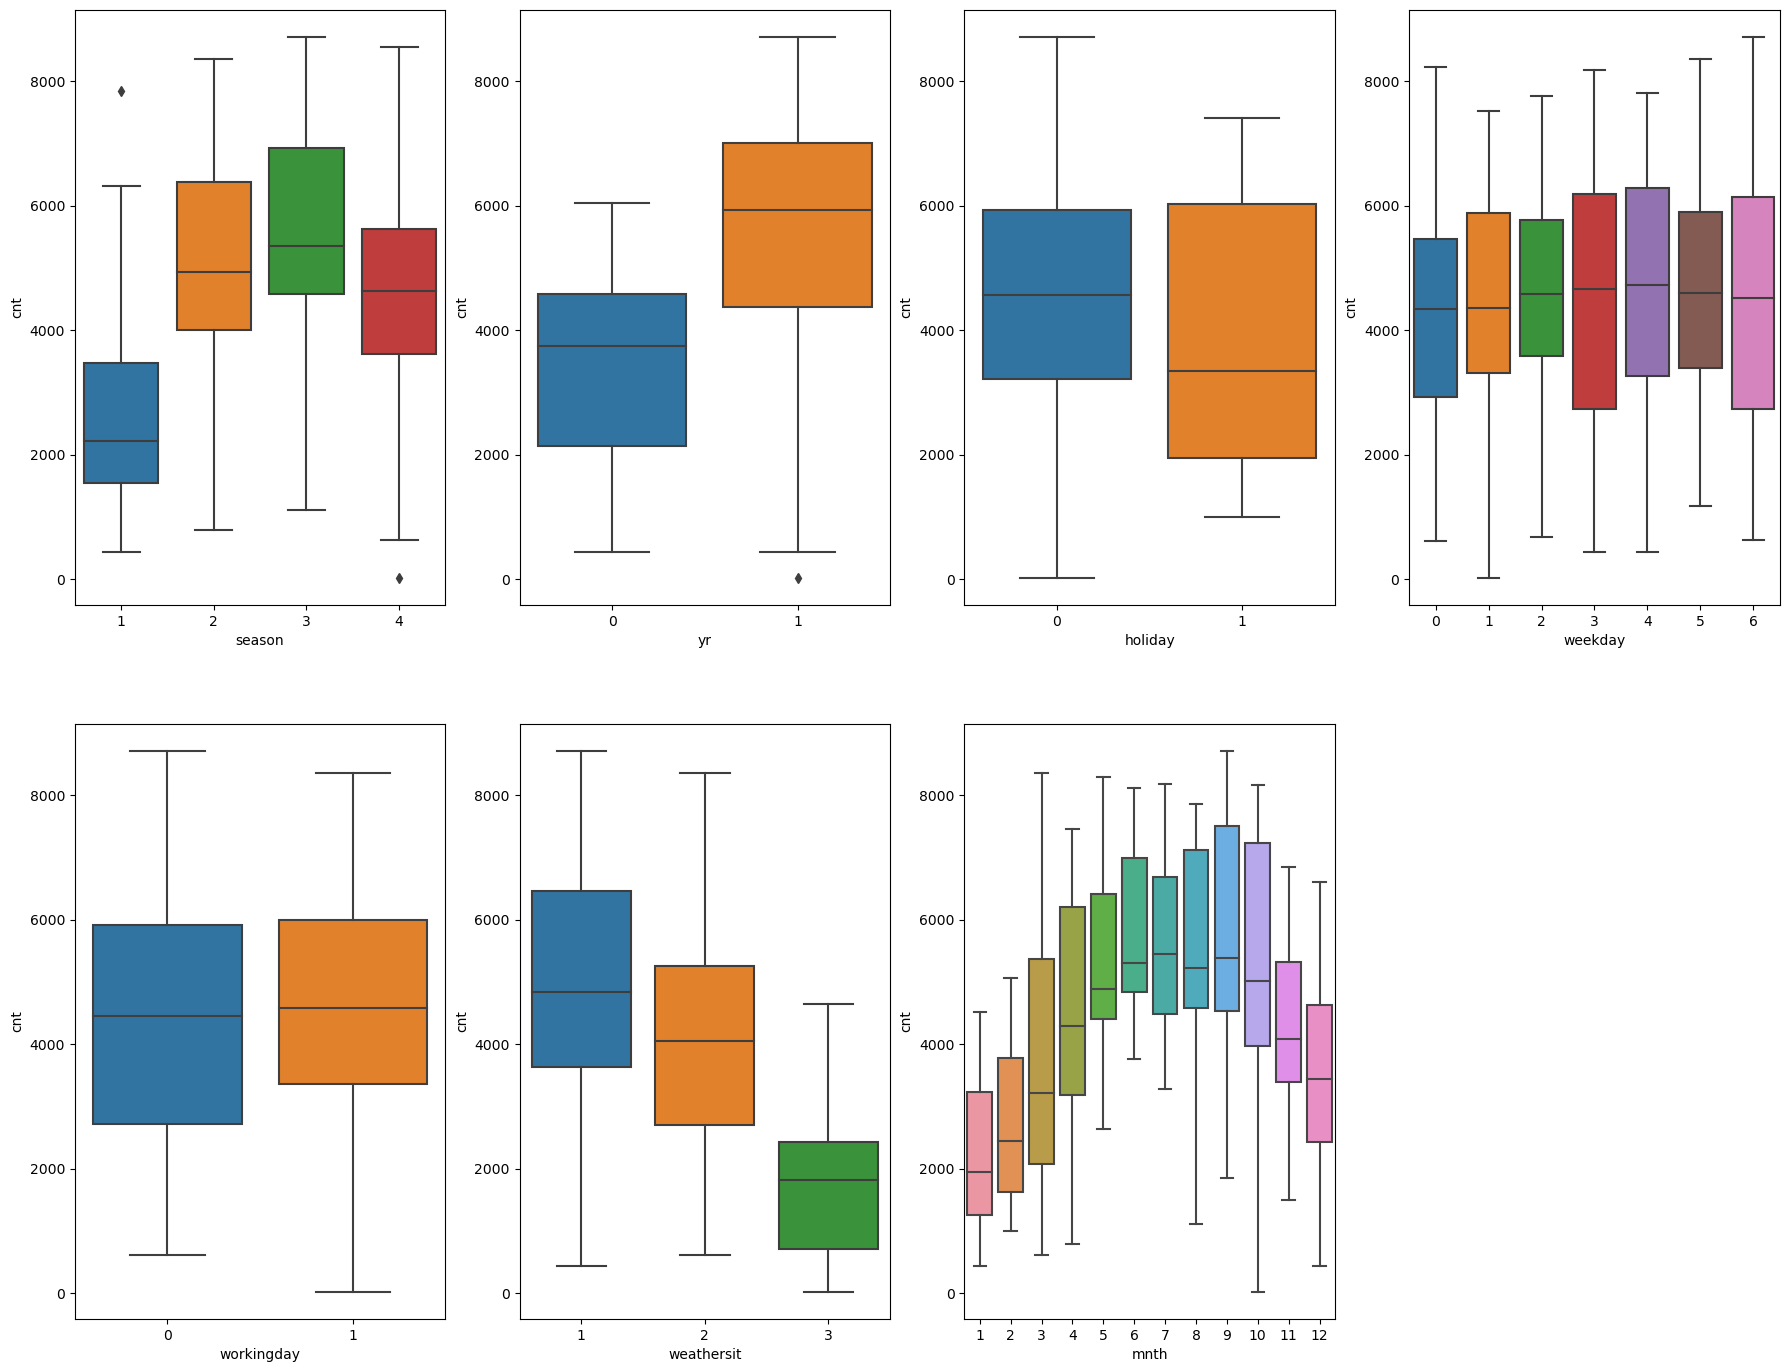

In [18]:
plt.figure(figsize=(22, 17))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
plt.show()

Conclusion:

1. The year 2019 had a higher count of users as compared to 2018.
2. The bike demand is almost constant throughout the week.
3. The count of total users is between 4000 to 6000 during clear weather
4. The count is highest in the month of August
5. Category 3: Fall, has the highest median, which means that the demand was high during this season. It is least for 1:spring.

To Visualize numerical variables,pairplot is used.

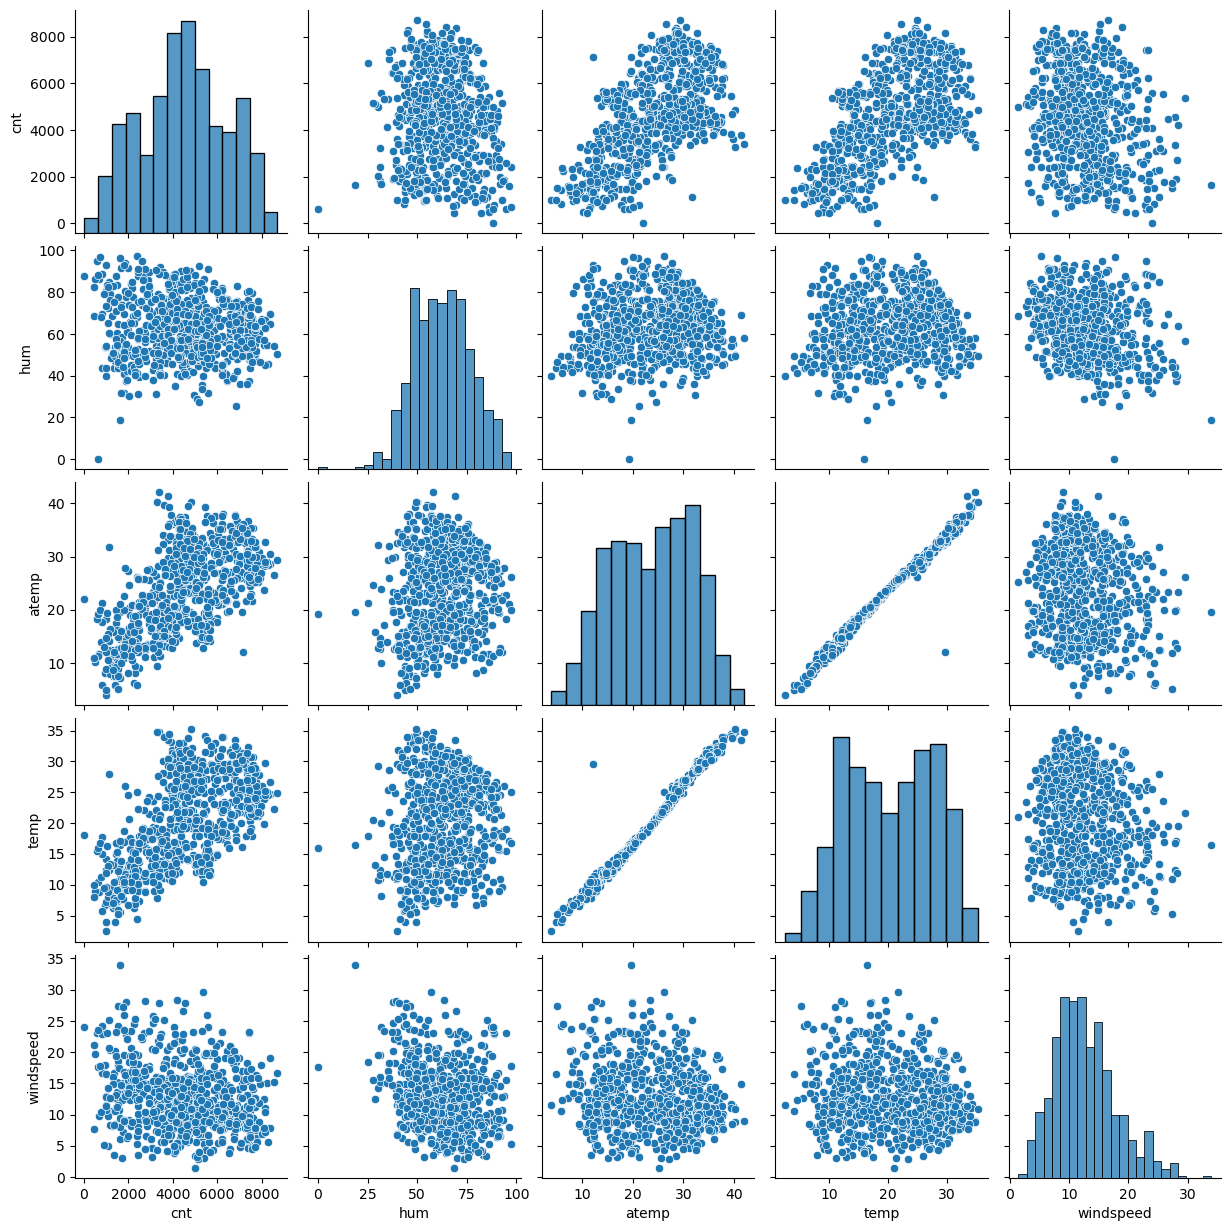

In [19]:
sns.pairplot(data = bike_new, vars=['cnt', 'hum', 'atemp', 'temp','windspeed'])
plt.show()

Conclusion:

There are some independent variables like atemp, temp and so on, that shows a positive correlation with the target variable cnt.
Hence a linear model is considered.

### DATA PREPARATION

In [20]:
import calendar
bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])

In [21]:
bike_new.weekday = bike_new.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})


In [22]:
# Mapping seasons

bike_new.season = bike_new.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [23]:
# Mapping weathersit

bike_new.weathersit = bike_new.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [24]:
# Check the dataframe now

bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Creating Dummy Variables

In [25]:
# Get the dummy variables for the features 'season','mnth','weekday','weathersit'' and store it in a new variable

dummy = bike_new[['season','mnth','weekday','weathersit']]

In [26]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [27]:
# Adding the dummy variables to the original dataset

bike_new = pd.concat([dummy,bike_new],axis = 1)

In [28]:
bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
#Deleting the orginal columns season,weathersit,weekday,mnth

bike_new.drop(['season'],axis=1,inplace=True)
bike_new.drop(['weathersit'],axis=1,inplace=True)
bike_new.drop(['weekday'],axis=1,inplace=True)
bike_new.drop(['mnth'],axis=1,inplace=True)


bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
#checking the shape after deletion

bike_new.shape

(730, 30)

### Splitting the Data into Training and Testing Set

In [31]:
#importing train_test_split

from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
test.shape

(219, 30)

In [33]:
train.shape

(510, 30)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_Aug                      510 non-null    uint8  
 4   mnth_Dec                      510 non-null    uint8  
 5   mnth_Feb                      510 non-null    uint8  
 6   mnth_Jan                      510 non-null    uint8  
 7   mnth_Jul                      510 non-null    uint8  
 8   mnth_Jun                      510 non-null    uint8  
 9   mnth_Mar                      510 non-null    uint8  
 10  mnth_May                      510 non-null    uint8  
 11  mnth_Nov                      510 non-null    uint8  
 12  mnth_Oct                      510 non-null    uint8  
 13  mnth

### Rescaling the Features 

Scaling might impact the model while performing multiple linear regression.  As the value of the feature cnt has 
much higher values as compared to the other features like temp, atemp etc.So it is extremely important to rescale 
the variables for them to be on a comparable scale. It is necessary to use standardization or normalization 
so that the units of the coefficients are all on the same scale.

In [35]:
#import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
# Apply scaler() to all the columns except the 'dummy' variables.

num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [37]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [38]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the coefficients to see which variables are highly correlated:

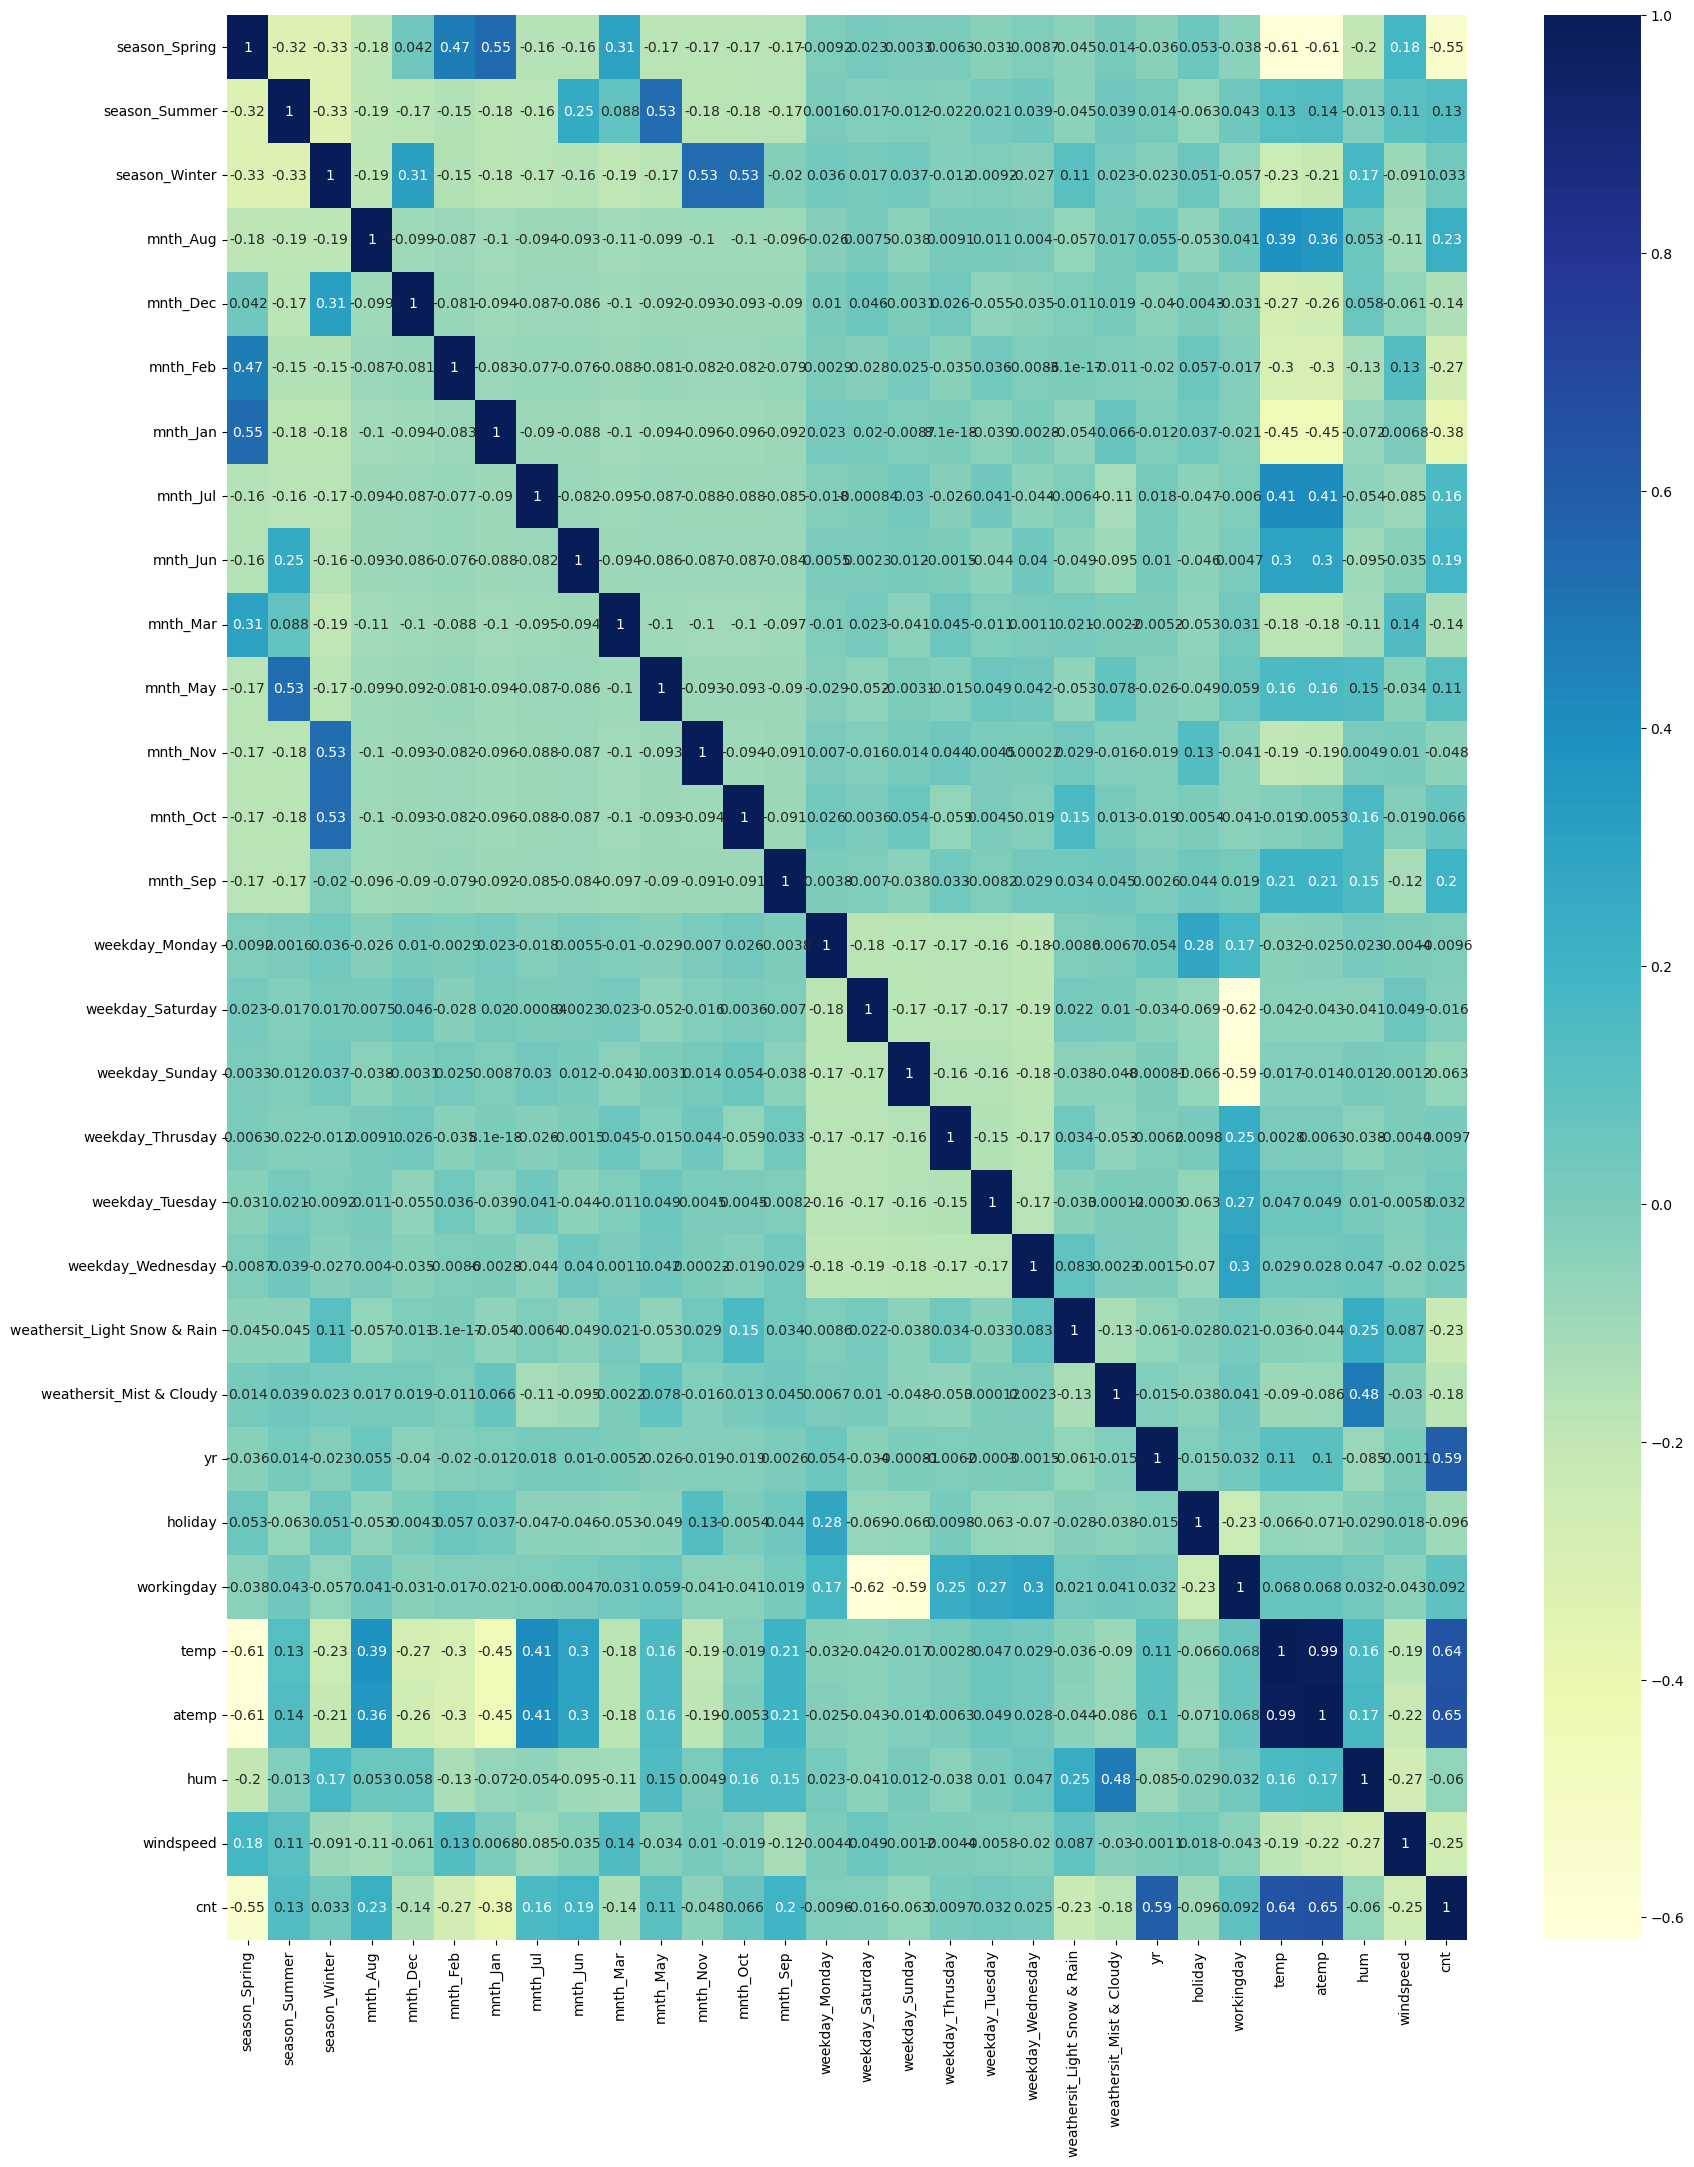

In [39]:
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Conclusion:

The atemp and temp seems to be correlated to the target variable cnt. Since, not much can be stated about the other independent variables ,we can build a model using all the columns.

Dividing into X and Y sets for the model building

In [40]:
# Building the Linear Model

y_train = train.pop('cnt')
X_train = train

In [41]:
y_train.shape

(510,)

### Building a linear model using RFE


In [42]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)           
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [47]:
# Creating X_test dataframe 

X_train_rfe = X_train[col]

In [48]:
#import statsmodels

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
X_train_rfe.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475


### Running the linear model


In [50]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

In [51]:
# Check the parameters obtained

lm_1.params

const                           0.251042
season_Spring                  -0.050806
season_Summer                   0.049660
season_Winter                   0.094426
mnth_Jan                       -0.034326
mnth_Jul                       -0.053193
mnth_Sep                        0.081186
weekday_Saturday                0.053721
weathersit_Light Snow & Rain   -0.248777
weathersit_Mist & Cloudy       -0.057824
yr                              0.230502
holiday                        -0.058529
workingday                      0.043521
temp                            0.509836
hum                            -0.154716
windspeed                      -0.185956
dtype: float64

In [52]:
#printing summary

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          2.31e-191
Time:                        23:58:53   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Checking VIF for multicollinearity

In [53]:
# Import variance_inflation_factor and Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
1,season_Spring,5.08
13,temp,3.89
3,season_Winter,3.60
2,season_Summer,2.64
14,hum,1.92
12,workingday,1.88
7,weekday_Saturday,1.78
4,mnth_Jan,1.57
9,weathersit_Mist & Cloudy,1.57


In [54]:
# We generally want a VIF that is less than 5
# dropping 'hum' column as the vif is > 5

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [55]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.00
1,season_Spring,5.03
13,temp,3.62
3,season_Winter,3.45
2,season_Summer,2.61
12,workingday,1.87
7,weekday_Saturday,1.77
4,mnth_Jan,1.56
5,mnth_Jul,1.48
6,mnth_Sep,1.29


### Preparing the final model

In [56]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model

lm_2 = sm.OLS(y_train,X_train_lm).fit()

In [57]:
# Check the summary

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          7.33e-189
Time:                        23:58:53   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [58]:
# Calculate the VIFs for the new model again

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.00
1,season_Spring,5.03
13,temp,3.62
3,season_Winter,3.45
2,season_Summer,2.61
12,workingday,1.87
7,weekday_Saturday,1.77
4,mnth_Jan,1.56
5,mnth_Jul,1.48
6,mnth_Sep,1.29


Conclusion:
    
Here we see that except for const and season_Spring rest all the columns have a vif value less than 5.Hence, we finalise lm_2 as the final model to proceed with the future predictions.

### Residual Analysis of the train data

In [59]:
#Now to check if the error terms are also normally distributed,let us plot the histogram of the error terms and see what it looks like.

y_train_cnt = lm_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

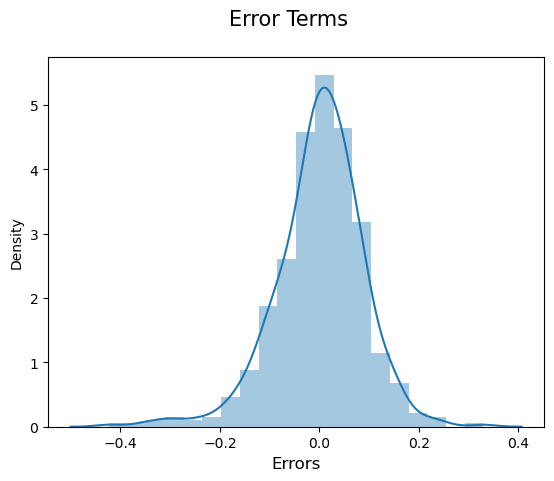

In [60]:
# Plotting the histogram 

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)                         # X-label

Conclusion:

We can clearly see that the error terms are centred around 0 and follows a normal distribution.

### Making Predictions Using the Final Model

In [61]:
#Applying the scaling on the test sets

num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [62]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [63]:
# Dividing into X_test and y_test

y_test = test.pop('cnt')
X_test = test

In [64]:
# Adding constant variable to test dataframe

X_test = sm.add_constant(X_test)

### Predicting using values used by the final model

In [65]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]

# Adding constant variable to test dataframe

X_test = sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Jan                      219 non-null    uint8  
 5   mnth_Jul                      219 non-null    uint8  
 6   mnth_Sep                      219 non-null    uint8  
 7   weekday_Saturday              219 non-null    uint8  
 8   weathersit_Light Snow & Rain  219 non-null    uint8  
 9   weathersit_Mist & Cloudy      219 non-null    uint8  
 10  yr                            219 non-null    int64  
 11  holiday                       219 non-null    int64  
 12  workingday                    219 non-null    int64  
 13  temp

In [66]:
# Making predictions using the final model

y_pred = lm_2.predict(X_test)

### Calculating the r-squared

In [67]:
#import r2_score

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8045478865351157

Conclusion:

We can see that the r_squared on the test set is 0.804 and the r-squared on the trained set 0.840 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

### Model Evaluation

Text(0, 0.5, 'y_pred')

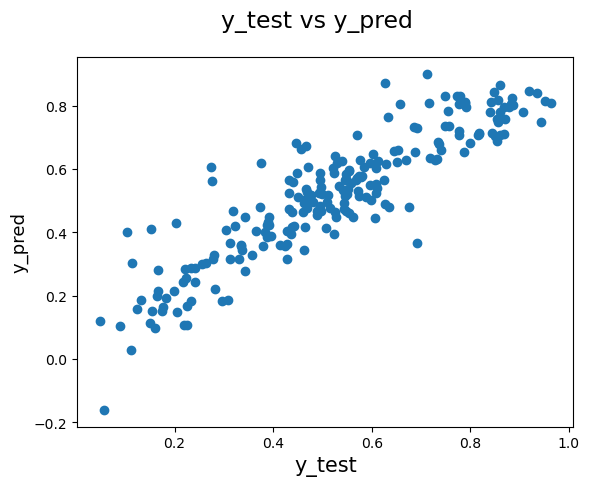

In [68]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 17)              # Plot heading 
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_pred', fontsize = 13)

In [69]:
# Getting the variable names and the coefficient values for the final equation of the best fitted line
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
13,temp,0.472823
10,yr,0.234361
0,const,0.173663
3,season_Winter,0.079699
6,mnth_Sep,0.075318
7,weekday_Saturday,0.058434
12,workingday,0.046502
2,season_Summer,0.043352
4,mnth_Jan,-0.038947


Conclusion:
    
1. All the positive coefficients like temp, season_Summer indicate that an increase in these values will lead to increase in cnt.
2. All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.
3. Based on final model top three features contributing significantly towards explaining the demand are:
   Temperature (0.472823)
   weathersit_Mist & Cloudy	(-0.082621)
   weathersit_Light Snow & Rain	(-0.291727)

### Final Recommendations for the Company:

1. The months which includes Jan,Jul,Sep,Nov,Dec should be taken into consideration as they have a higher demand.
2. As the demand rises during the Winter season the company should be prepared to meet the high demand.
3. With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
